# Lab 1: Implementing the Perceptron Algorithm in "Just" Python 

In this lab, you are asked to implement the classic Perceptron for binary classification (here: 0/1 class labels), which we have discussed in the lecture. 

In particular, you should only use "basic" or "vanilla" Python functions for this implementation. Hence, no `import`s besides matplotlib will be permitted for this homework.

The goal of this exercise is to familiarize yourself with NumPy implementation. Hence, you may wish to explore the NumPy code on Canvas when you implement the Perceptron in "pure" Python. Note that you are also asked to use the overal structure of the `Perceptron` Python `class`. While it may seem strange to you at first, it will be useful later when will discuss PyTorch for deep learning. The way PyTorch works is similar to this class (i.e., using a model `class` with `forward` and `backward` methods). 

### Important!

**The lab assignment is due on March 31, 2023 (11:59 pm) and should be submitted via Canvas.**

- Please submit the `.ipynb` file with your solution as well as an HTML version (use `File -> export as -> HTML`) as a backup in case we cannot open your .ipynb on our computer.

- I recommend using the conda package manager for installing Python >=3.8 and Jupyter Notebook (or Jupyter Lab). 

- Also consider this YouTube tutorial for a more visual setup guide for conda: https://www.youtube.com/watch?v=YJC6ldI3hWk (Python Tutorial: Anaconda - Installation and Using Conda). Please reach out to me or the TA if you need any help of have questions.


## 0) Imports

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 1) Loading the dataset

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [13]:
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))

In [14]:
import random


random.seed(123)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

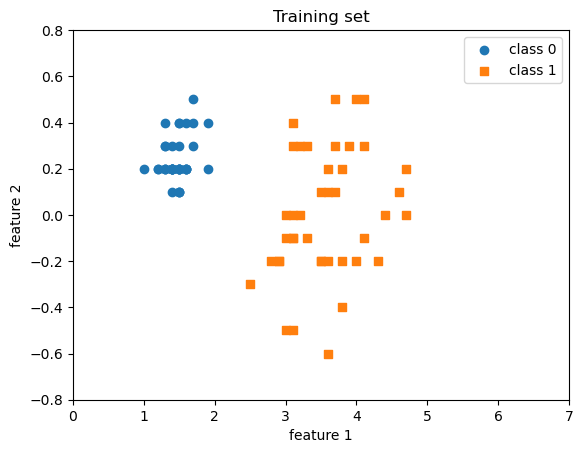

In [15]:
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## Defining the Perceptron model

Below, you need to complete the code of the Perceptron model class based on the framework I provided.

In [16]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [0] * num_features
        self.bias = 0

    def forward(self, x):
        linear = sum(w*xi for w, xi in zip(self.weights, x)) + self.bias
        pred = 1 if linear >= 0 else 0
        return pred
        
    def backward(self, x, y):
        error = y - self.forward(x)
        return error
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(len(y)):
                error = self.backward(x[i], y[i])
                self.weights = [w + error * xi for w, xi in zip(self.weights, x[i])]
                self.bias += error
        value=[self.weights,self.bias]
        return value

    def evaluate(self, x, y):
        num_correct = 0
        for i in range(len(y)):
            if self.forward(x[i]) == y[i]:
                num_correct += 1
        accuracy = num_correct / len(y)
        return accuracy


## Training the Perceptron

Here, you are asked to train the perceptron for 5 epochs and print out the Perceptron weight parameters and the value of the bias unit after training.

- The code should be relatively similar to the code you've seen in the lecture.

In [17]:
ppn = Perceptron(num_features=2)
ppn.train(X_train,y_train,5)

[[1.7999999999999992, -1.3000000000000003], -4]

## Evaluating the model

Compute the prediction accuracy (in percent) for both the training set and the test set.

In [18]:
train_acc=ppn.evaluate(X_train,y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [19]:
ppn.train(X_test,y_test,5)
test_acc=ppn.evaluate(X_test,y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Decision Boundary

Make 2 scatterplots: 1 for the training dataset and 1 for the test dataset. Draw the respective decision boundaries of the perceptron in each plot.

In [20]:
w1=ppn.train(X_train,y_train,5)[0][0]
w2=ppn.train(X_train,y_train,5)[0][1]
bias=ppn.train(X_train,y_train,5)[1]
print(w1,w2,bias)

1.7999999999999992 -1.3000000000000003 -4


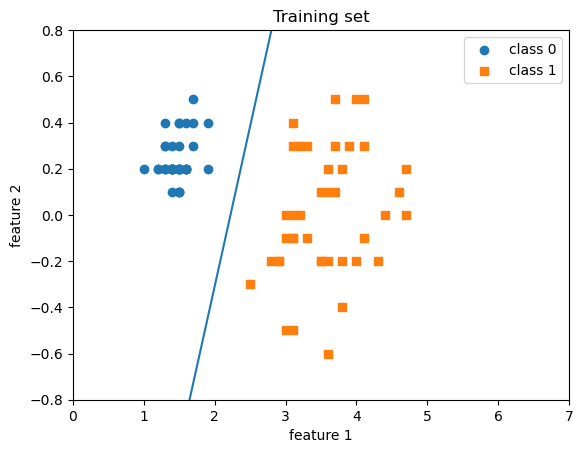

In [21]:
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

x1=np.arange(1, 4.5, 0.1)
x2=np.arange(-0.6, 0.4, 0.1)
x2=(-w1*x1-bias)/w2

# Create a plot with the data
plt.plot(x1, x2)

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

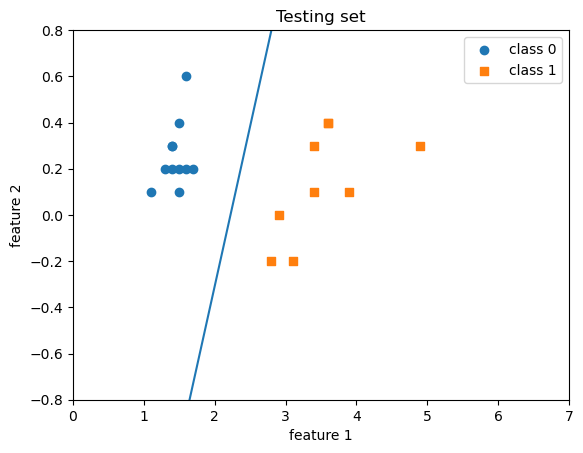

In [22]:
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')

x1=np.arange(1, 4.5, 0.1)
x2=np.arange(-0.6, 0.4, 0.1)
x2=(-w1*x1-bias)/w2

# Create a plot with the data
plt.plot(x1, x2)

plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()